In [1]:
import os
from datasets import load_dataset
import helper_utils as utils
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

/home/omar/TUM/05_projects/2D-Object-Detection/objDet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

ds = load_dataset("keremberke/football-object-detection")
ds.save_to_disk("./football-object-detection")
print(ds)

Saving the dataset (1/1 shards): 100%|██████████| 130/130 [00:00<00:00, 3448.04 examples/s]

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 859
    })
    validation: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 243
    })
    test: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 130
    })
})


[80.0, 356.0, 33.18000030517578, 60.060001373291016]
<PIL.Image.Image image mode=L size=1280x720 at 0x7101EC12ECB0>


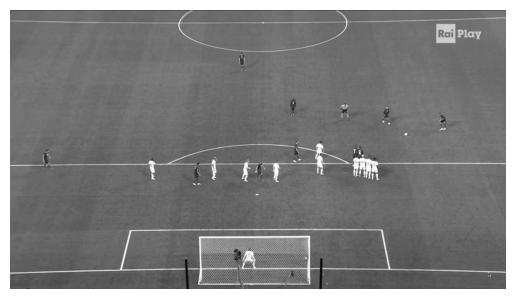

In [3]:
# Access the first image in the training set
image_data = ds['train'][0]['image'].convert("L")
id= ds['train'][0]['objects']['id'][0]
id= ds['train'][0]['objects']['bbox'][0]

print(id)
# Convert to PIL Image (if not already)
print(image_data.convert("L"))
# Display the image using matplotlib
plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)
plt.axis('off')  # Hide axes
plt.show()


In [4]:

# Convert the PIL image to a NumPy array

image_data = ds['train'][0]['image']
bboxes = ds['train'][0]['objects']['bbox']

utils.vis_bbox(image_data,bboxes)

[[80.0, 356.0, 33.18000030517578, 60.060001373291016], [351.0, 381.0, 44.18000030517578, 60.060001373291016], [467.0, 392.0, 27.559999465942383, 64.0199966430664], [516.0, 377.0, 21.229999542236328, 64.0199966430664], [589.0, 107.0, 23.579999923706055, 51.369998931884766], [596.0, 383.0, 25.950000762939453, 64.0199966430664], [632.0, 389.0, 29.889999389648438, 56.11000061035156], [677.0, 386.0, 24.350000381469727, 60.849998474121094], [720.0, 222.0, 19.6200008392334, 53.7400016784668], [729.0, 334.0, 25.149999618530273, 59.27000045776367], [784.0, 337.0, 26.739999771118164, 52.95000076293945], [787.0, 367.0, 27.530000686645508, 60.849998474121094], [851.0, 239.0, 27.510000228881836, 51.369998931884766], [958.0, 246.0, 25.1200008392334, 55.31999969482422], [1017.0, 315.0, 10.09000015258789, 11.850000381469727], [1101.0, 263.0, 26.65999984741211, 51.369998931884766], [880.0, 345.0, 20.399999618530273, 60.060001373291016], [897.0, 346.0, 20.389999389648438, 41.88999938964844], [881.0, 375